## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных 
по играм из Google Play Store

Датасет содержит следующие колонки:
- App - название
- Category - категория
- Rating - пользовательский рейтинг
- Reviews - кол-во оценок
- Size - размер приложения
- Installs - скачиваний
- Type - тип приложения (платное/бесплатное)
- Price - цена
- Content Rating - возрастной рейтинг
- Genres - жанры
- Last Updated - дата последнего обновления
- Current Ver - текущая версия
- Android Ver - мин. версия Android

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [123]:
data = pd.read_csv('data/googleplaystore.csv', sep=",")

In [124]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    percentage = 100.0 * temp_null_count / data[col].size
    print('{} - {} ({:.2f}%)'.format(col, temp_null_count, percentage))

App - 0 (0.00%)
Category - 0 (0.00%)
Rating - 1474 (13.60%)
Reviews - 0 (0.00%)
Size - 0 (0.00%)
Installs - 0 (0.00%)
Type - 1 (0.01%)
Price - 0 (0.00%)
Content Rating - 1 (0.01%)
Genres - 0 (0.00%)
Last Updated - 0 (0.00%)
Current Ver - 8 (0.07%)
Android Ver - 3 (0.03%)


# 2) Обработка пропусков в количественном признаке

In [125]:
sort_data=data['Rating'].unique()
sort_data.sort()
print(sort_data)

[ 1.   1.2  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5
  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9
  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.  19.   nan]


Следует удалить записи с ошибочными данными

In [126]:
data = data.drop(index=data[data['Rating'] > 5].index)

In [127]:
sort_data_fix=data['Rating'].unique()
sort_data_fix.sort()
print(sort_data_fix)

[1.  1.2 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9
 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9 5.  nan]


(array([1.600e+01, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 3.000e+00,
        1.200e+01, 0.000e+00, 8.000e+00, 1.300e+01, 1.200e+01, 8.000e+00,
        1.400e+01, 3.900e+01, 0.000e+00, 2.100e+01, 2.500e+01, 2.500e+01,
        8.700e+01, 0.000e+00, 8.300e+01, 6.900e+01, 1.660e+02, 1.280e+02,
        0.000e+00, 1.630e+02, 1.740e+02, 5.420e+02, 3.860e+02, 0.000e+00,
        5.680e+02, 7.080e+02, 2.028e+03, 0.000e+00, 1.109e+03, 1.038e+03,
        8.230e+02, 7.330e+02, 0.000e+00, 3.610e+02]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
        3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
        4.9, 5. ]),
 <BarContainer object of 40 artists>)

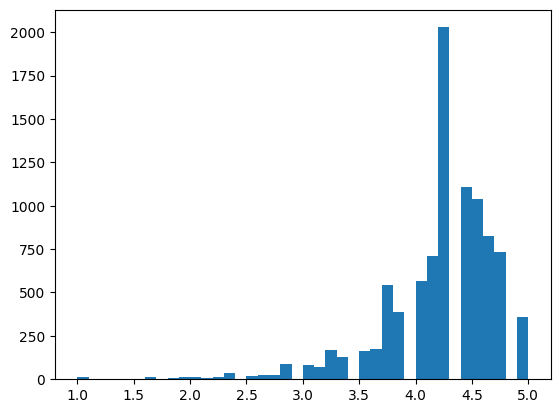

In [128]:
plt.hist(data['Rating'], bins=40, range=(1,5))

In [129]:

strategies=['mean', 'median', 'most_frequent']
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [130]:
print(test_num_impute_col(data, 'Rating', strategies[0]))
print(test_num_impute_col(data, 'Rating', strategies[1]))
print(test_num_impute_col(data, 'Rating', strategies[2]))

('Rating', 'mean', 1474, 4.191757420456972, 4.191757420456972)
('Rating', 'median', 1474, 4.3, 4.3)
('Rating', 'most_frequent', 1474, 4.4, 4.4)


Из гистограммы видно, что наиболее предпочтительнее использовать метод 'mean'.
Сравним полученные гистограммы

Text(0.5, 1.0, 'without NaN')

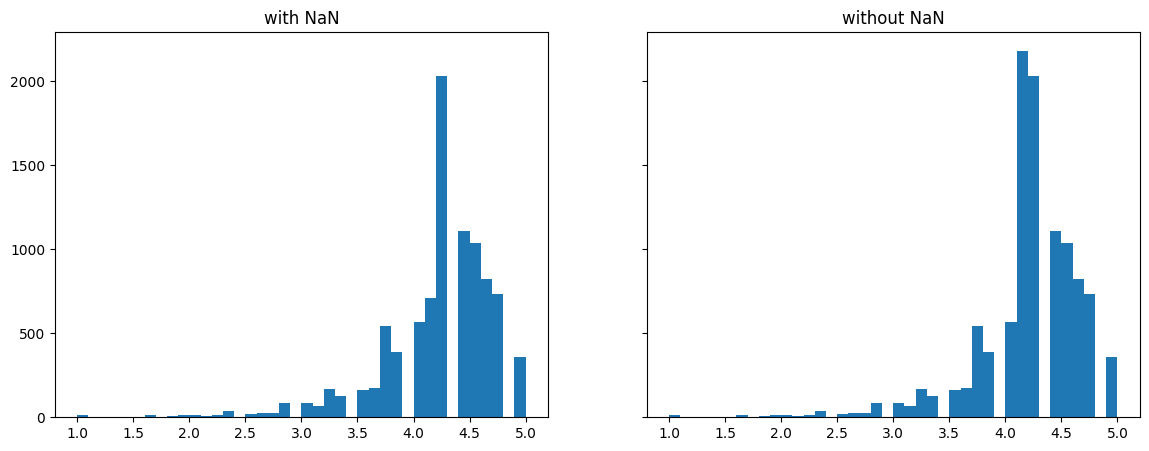

In [131]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(14,5))
ax[0].hist(data['Rating'], bins=40, range=(1,5))
ax[1].hist(data['Rating'].fillna(data['Rating'].mean()), bins=40, range=(1,5))
ax[0].set_title('with NaN')
ax[1].set_title('without NaN')

In [132]:

data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

# 3) Обработка пропусков в категориальном признаке

In [133]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [134]:
print('Кол-во пропусков: ',data[data['Content Rating'].isnull()].shape[0])
data['Content Rating'].value_counts()

Кол-во пропусков:  0


Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Пропуски можно заполнить значением 'Unrated'

In [135]:
data_imp = data['Content Rating'].fillna('Unrated')

In [136]:
print('Кол-во пропусков: ',data_imp[data['Content Rating'].fillna('Unrated').isnull()].shape[0])
data['Content Rating'].fillna('Unrated').value_counts()

Кол-во пропусков:  0


Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Заполним пропуски

In [137]:
data['Content Rating'] = data['Content Rating'].fillna('Unrated')

# 4) График "Скрипичная диаграмма"

<Axes: xlabel='Rating'>

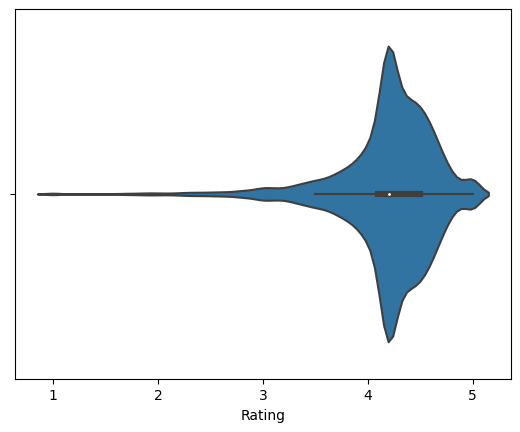

In [138]:
sns.violinplot(x=data['Rating'])